In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns


In [2]:
#Load the data
data = pd.read_excel('data.xlsx','data') 
data = pd.DataFrame(data)
#data.head()

In [3]:
#Defining variables (X and y)
X=data[['exercise_hrs','books','gender','age']]
y=data['score']

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Defining the model
regressor = LinearRegression()

#Fitting the model
regressor.fit(X_train, y_train)

LinearRegression()

In [4]:
#The intercept
print("The intercept is:", regressor.intercept_)

#Coefficients for independent variables (X)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

The intercept is: 21.321034232298338


,Coefficient
exercise_hrs,5.668674
books,2.138478
gender,-0.505901
age,0.156356


In [5]:
#Making predictions
y_pred = regressor.predict(X_test)

#Comparing the actual values and the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
63,50,46.128345
247,36,37.505410
296,80,80.767630
124,30,40.390650
188,70,65.116491
...,...,...
34,65,66.523692
108,40,41.731866
33,80,72.974145
21,40,47.414208


<IPython.core.display.Javascript object>

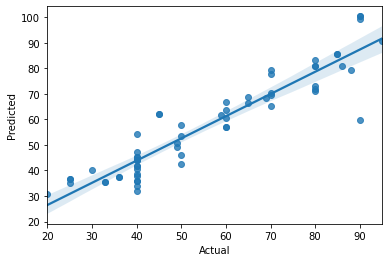

In [6]:
#Plotting actual against predicted values
sns.regplot(data=df, x="Actual", y="Predicted")
plt.show()

In [7]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.690024609636992
Mean Squared Error: 59.35070458883044


<IPython.core.display.Javascript object>

Root Mean Squared Error: 7.70394084795765
